In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot 
from scipy import stats

from IPython.display import display
pd.options.display.max_columns = None
#pd.options.display.max_columns = 100
#pd.options.display.max_rows = None --> shows all rows, your notebooks becomes slow 
pd.options.display.max_rows = 200

import warnings
warnings.filterwarnings('ignore')

import os
print (os.getcwd())
#print (os.listdir())

/Users/rajkiran/Desktop/MACHINE LEARNING Praveen/Notebooks


In [2]:
house_df = pd.read_csv("housing_price.csv")
house_df.shape

(1460, 81)

In [3]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
print("*"*100)

****************************************************************************************************


# Ques 1 : 
## ---------->  Which Type of MSSubClass houses are Costlier...? 🧐

In [6]:
min_costlier = house_df.groupby(['MSSubClass'])['SalePrice'].min().reset_index()
min_costlier  

,MSSubClass,SalePrice
0,20,35311
1,30,34900
2,40,79500
3,45,76000
4,50,37900
5,60,129000
6,70,40000
7,75,101000
8,80,107000
9,85,123000


<AxesSubplot:xlabel='MSSubClass'>

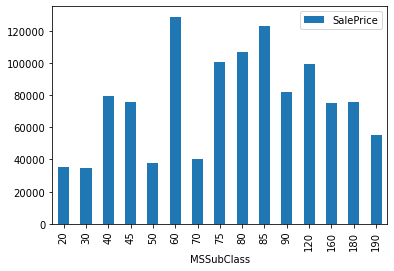

In [7]:
min_costlier.set_index('MSSubClass').plot(kind='bar')  # if you dont give Set_index(), it will print index along x-axis

In [89]:
max_costlier = house_df.groupby(['MSSubClass'])['SalePrice'].max().reset_index()
max_costlier

,MSSubClass,SalePrice
0,20,611657
1,30,163500
2,40,260000
3,45,139400
4,50,410000
5,60,755000
6,70,359100
7,75,475000
8,80,345000
9,85,198500


<AxesSubplot:xlabel='MSSubClass'>

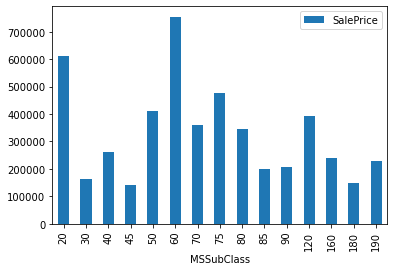

In [93]:
max_costlier.set_index('MSSubClass').plot(kind='bar')

In [90]:
mean_costlier = house_df.groupby(['MSSubClass'])['SalePrice'].mean().reset_index()
mean_costlier

,MSSubClass,SalePrice
0,20,185224.811567
1,30,95829.724638
2,40,156125.000000
3,45,108591.666667
4,50,143302.972222
5,60,239948.501672
6,70,166772.416667
7,75,192437.500000
8,80,169736.551724
9,85,147810.000000


<AxesSubplot:xlabel='MSSubClass'>

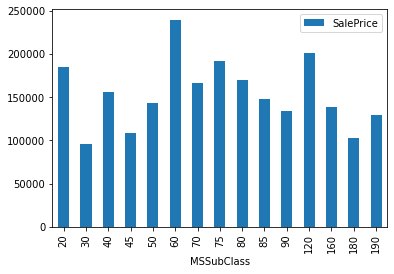

In [91]:
mean_costlier.set_index('MSSubClass').plot(kind='bar')

## House type 60 is costlier

In [10]:
print("*"*100)

****************************************************************************************************


# Ques 2 :
## ----------> How Many houses show minimum garage area where max no of cars would fit...?

##  More no of cars = 4.. so... Show me the houses with GarageArea, where 4 cars fit

In [11]:
house_df[['GarageCars','GarageArea']].describe()

,GarageCars,GarageArea
count,1460.000000,1460.000000
mean,1.767123,472.980137
std,0.747315,213.804841
min,0.000000,0.000000
25%,1.000000,334.500000
50%,2.000000,480.000000
75%,2.000000,576.000000
max,4.000000,1418.000000


In [12]:
house_df.loc[house_df['GarageCars']==4][['GarageCars','GarageArea']]#.describe()

,GarageCars,GarageArea
420,4,784
747,4,864
1190,4,1356
1340,4,480
1350,4,968


<AxesSubplot:>

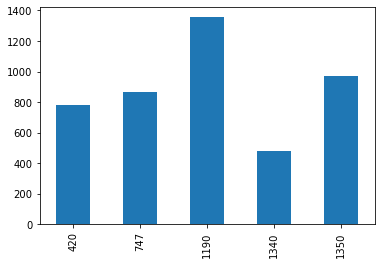

In [13]:
house_df.loc[house_df['GarageCars']==4]['GarageArea'].plot(kind='bar')

### There is only 1 house (1340) with min garage area of 480sft where max 4 cars can fit

In [14]:
print("*"*100)

****************************************************************************************************


# Ques 3 :
## ----------> Which Type of MSSubClass houses have been sold Higher in number between 1950 to till date...?

In [15]:
type_ms = house_df.loc[house_df['YrSold'].between(1950,2021)][['MSSubClass','YrSold']].groupby('MSSubClass').count()
type_ms

,YrSold
MSSubClass,
20,536
30,69
40,4
45,12
50,144
60,299
70,60
75,16
80,58


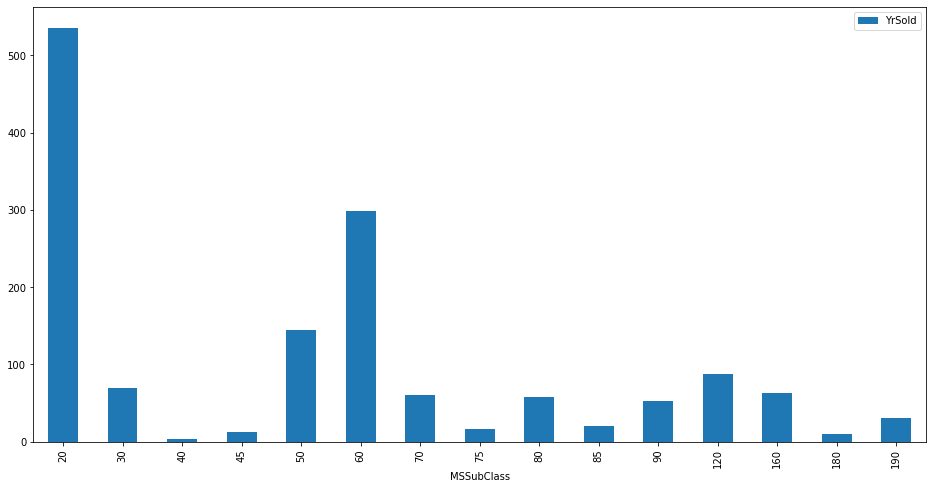

In [16]:
type_ms.plot(kind='bar',figsize=(16,8));

# House Type 20 (1-STORY 1946 & NEWER ALL STYLES) were sold higher

In [17]:
print("*"*110)

**************************************************************************************************************


# Ques 4. 
## ---------> Do the Houses that Accommodate more cars are Costlier..?

<AxesSubplot:>

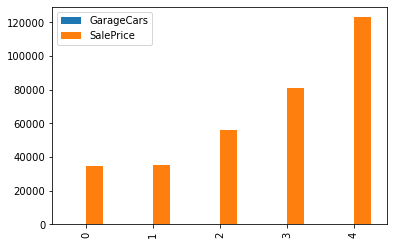

In [18]:
house_df.groupby(['GarageCars'])['SalePrice'].min().reset_index().plot(kind='bar')

<AxesSubplot:>

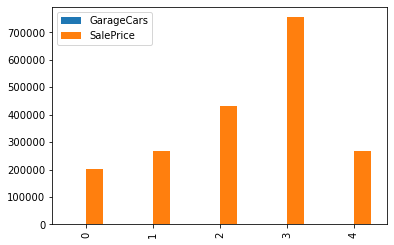

In [19]:
house_df.groupby(['GarageCars'])['SalePrice'].max().reset_index().plot(kind='bar')

## Yes, The houses that Accommodate more Cars are Costlier...

In [20]:
print("*"*100)

****************************************************************************************************


# Ques 5. 
## ---------> Which kind of Neighborhood Houses are Costlier...?

<AxesSubplot:xlabel='Neighborhood'>

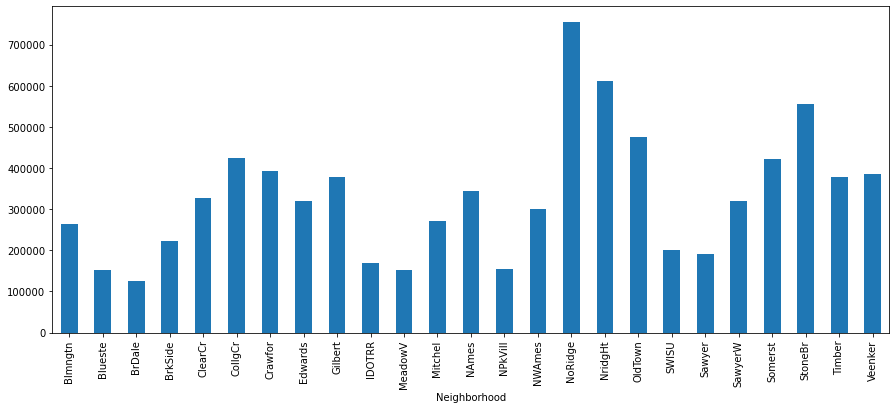

In [21]:
house_df.groupby(['Neighborhood'])['SalePrice'].max().plot(kind='bar',figsize=(15,6))

In [22]:
house_df.groupby(['Neighborhood'])['SalePrice'].aggregate(['mean','median','min','max','count'])

,mean,median,min,max,count
Neighborhood,,,,,
Blmngtn,194870.882353,191000,159895,264561,17
Blueste,137500.000000,137500,124000,151000,2
BrDale,104493.750000,106000,83000,125000,16
BrkSide,124834.051724,124300,39300,223500,58
ClearCr,212565.428571,200250,130000,328000,28
CollgCr,197965.773333,197200,110000,424870,150
Crawfor,210624.725490,200624,90350,392500,51
Edwards,128219.700000,121750,58500,320000,100
Gilbert,192854.506329,181000,141000,377500,79


# Ques 6
## --------> OverallQual wise,List down the mean and Median Sale Prices

In [95]:
house_df.groupby(['OverallQual'])['SalePrice'].aggregate(['mean','median','min','max','count'])

,mean,median,min,max,count
OverallQual,,,,,
1,50150.000000,50150,39300,61000,2
2,51770.333333,60000,35311,60000,3
3,87473.750000,86250,37900,139600,20
4,108420.655172,108000,34900,256000,116
5,133523.347607,133000,55993,228950,397
6,161603.034759,160000,76000,277000,374
7,207716.423197,200141,82500,383970,319
8,274735.535714,269750,122000,538000,168
9,367513.023256,345000,239000,611657,43


# Ques 7
## --------> DO oldest houses accommodate More Cars or new houses..?

In [24]:
house_df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [25]:
old_houses = house_df.loc[house_df['YearBuilt']<1973][['GarageCars','YearBuilt']]\
.groupby('GarageCars').count().reset_index()
old_houses

,GarageCars,YearBuilt
0,0,69
1,1,341
2,2,301
3,3,14
4,4,4


In [26]:
old_houses.sum()

GarageCars     10
YearBuilt     729
dtype: int64

In [27]:
new_houses = house_df.loc[house_df['YearBuilt']>=1973][['GarageCars','YearBuilt']]\
.groupby('GarageCars').count().reset_index()
new_houses

,GarageCars,YearBuilt
0,0,12
1,1,28
2,2,523
3,3,167
4,4,1


In [28]:
new_houses.sum()

GarageCars     10
YearBuilt     731
dtype: int64

# Newer houses Accommodate More Number of cars

In [29]:
print("*"*100)

****************************************************************************************************


# Ques 8 :
## ----------> Do the TotRmsAbvGrd impacts SalePrice..?

In [97]:
tot_rms_abv_grd = house_df.groupby(['TotRmsAbvGrd'])[['SalePrice','TotalBsmtSF']].max().reset_index()
tot_rms_abv_grd

,TotRmsAbvGrd,SalePrice,TotalBsmtSF
0,2,39300,0
1,3,155900,848
2,4,260000,1602
3,5,392500,1842
4,6,374000,1869
5,7,465000,3206
6,8,466500,2633
7,9,501837,2524
8,10,755000,3200
9,11,611657,3138


<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

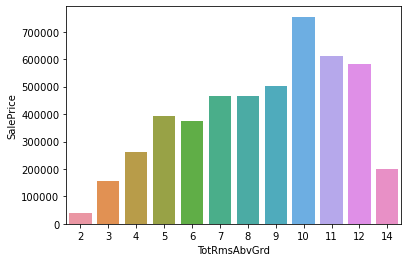

In [31]:
sns.barplot(x='TotRmsAbvGrd',y='SalePrice',hue_order='TotalBsmtSF',data=tot_rms_abv_grd)

<AxesSubplot:xlabel='TotRmsAbvGrd'>

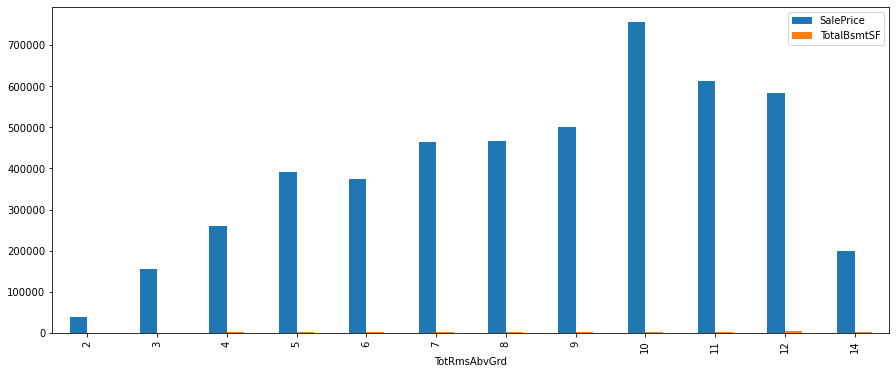

In [32]:
tot_rms_abv_grd.set_index('TotRmsAbvGrd').plot(kind='bar',figsize=(15,6))

#  Now, with Pivot Table

In [33]:
p_t = house_df.pivot_table(index='TotRmsAbvGrd',columns='TotalBsmtSF',values='SalePrice',aggfunc=('max'))
p_t

TotalBsmtSF,0,105,190,264,270,290,319,360,372,384,408,420,440,458,462,480,482,483,485,504,506,520,525,528,530,533,536,539,540,544,546,547,551,559,560,561,570,572,576,585,588,596,600,602,608,611,612,616,617,622,624,625,626,630,636,637,641,644,648,649,650,651,654,655,656,658,660,661,662,663,672,673,676,680,683,684,686,689,690,691,693,696,697,698,700,702,704,707,708,709,710,712,713,714,715,716,718,720,721,723,725,727,728,729,731,732,735,736,738,740,741,742,744,746,747,750,755,756,757,761,764,765,768,770,771,773,774,776,777,778,780,783,784,788,789,791,792,793,794,795,796,798,799,800,802,803,804,806,807,808,810,811,813,814,815,816,817,818,819,822,824,825,828,831,832,833,836,839,840,841,844,845,846,847,848,849,853,854,855,856,858,859,860,861,862,864,866,868,870,872,873,874,876,879,880,882,883,884,888,892,893,894,896,900,901,907,908,910,911,912,913,915,916,918,920,923,924,925,926,927,928,930,931,932,935,936,938,939,940,941,942,943,944,945,948,950,951,952,953,954,955,956,958,959,960,961,963,964,965,967,968,969,970,971,972,973,974,975,976,978,979,980,981,982,983,984,985,988,990,991,992,993,994,996,998,999,1001,1002,1003,1004,1005,1006,1007,1008,1010,1012,1013,1017,1019,1020,1021,1022,1024,1026,1028,1029,1030,1032,1034,1039,1040,1041,1042,1048,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1062,1063,1064,1065,1067,1069,1070,1073,1074,1075,1078,1079,1080,1082,1084,1085,1086,1088,1090,1092,1094,1095,1096,1097,1098,1099,1100,1103,1104,1105,1106,1107,1108,1109,1112,1113,1114,1116,1117,1120,1121,1122,1125,1126,1127,1128,1132,1134,1136,1138,1140,1141,1142,1143,1144,1145,1148,1149,1150,1151,1152,1153,1154,1156,1157,1158,1160,1161,1162,1163,1164,1165,1175,1176,1181,1184,1187,1188,1190,1192,1193,1194,1195,1196,1198,1199,1200,1202,1203,1204,1205,1208,1210,1212,1214,1215,1216,1218,1219,1220,1221,1223,1224,1225,1226,1228,1232,1234,1235,1237,1240,1241,1242,1244,1246,1247,1248,1249,1251,1252,1253,1256,1257,1258,1260,1261,1262,1264,1266,1267,1268,1269,1271,1272,1273,1274,1276,1277,1278,1281,1284,1286,1288,1291,1293,1296,1297,1298,1299,1300,1302,1304,1306,1309,1310,1311,1314,1316,1318,1319,1324,1328,1330,1332,1337,1338,1340,1344,1346,1347,1349,1350,1352,1356,1358,1360,1361,1362,1364,1367,1368,1370,1372,1373,1374,1375,1379,1383,1385,1386,1389,1390,1391,1392,1393,1394,1396,1398,1405,1406,1408,1410,1413,1414,1416,1417,1419,1422,1424,1425,1428,1430,1431,1434,1436,1437,1440,1442,1444,1452,1453,1454,1459,1461,1462,1463,1466,1468,1470,1473,1475,1476,1477,1478,1479,1482,1484,1485,1486,1488,1489,1490,1494,1496,1498,1499,1500,1501,1502,1504,1505,1510,1516,1517,1518,1520,1522,1525,1530,1533,1536,1541,1542,1552,1554,1559,1560,1561,1563,1565,1566,1567,1568,1571,1572,1573,1574,1575,1580,1581,1582,1584,1588,1593,1594,1595,1598,1600,1602,1604,1606,1610,1614,1616,1617,1620,1622,1623,1624,1626,1629,1630,1632,1638,1643,1649,1650,1652,1654,1656,1657,1660,1670,1673,1680,1682,1683,1684,1686,1689,1694,1698,1700,1702,1704,1705,1709,1710,1713,1719,1720,1722,1726,1728,1732,1734,1742,1746,1752,1753,1763,1766,1768,1777,1792,1795,1800,1809,1814,1822,1833,1836,1838,1842,1844,1845,1848,1856,1860,1868,1869,1896,1902,1905,1907,1922,1926,1930,1932,1935,1947,1952,1976,1980,1986,1992,2000,2002,2006,2033,2035,2042,2046,2076,2077,2078,2109,2110,2121,2136,2153,2158,2216,2217,2223,2330,2392,2396,2444,2524,2633,3094,3138,3200,3206,6110
TotRmsAbvGrd,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [34]:
#p_t.plot(kind='bar',figsize=(8,6))

## Yes, Total Rooms above Grade is IMPACTING the Sale Price

In [35]:
print("*"*100)

****************************************************************************************************


# Ques 9 
## ---------> List out the Pairs of Independent variables that show High Correlation

In [36]:
X = house_df.drop(columns = ['SalePrice'])
X.shape

(1460, 80)

In [37]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",props=[("font-size","7pt")]),
           dict(selector="td",props=[('padding',"0em 0em")]),
           dict(selector="th:hover",props=[("font-size","12pt")]),
           dict(selector="tr:hover td:hover",props=[('max-width','200px'),('font-size','12pt')])
           ]
X.corr().style.background_gradient(cmap,axis=1)\
    .set_properties(**{'max-width':'80px','font-size':'10pt'})\
    .set_caption("Hover to Magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,-0.01,-0.01,-0.02,0.01,0.01,-0.04,0.01,0.00,-0.02,0.01,0.01,0.04,0.00,0.03,-0.02,0.00,0.02,0.02,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00
MSSubClass,0.01,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.09,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02
LotFrontage,-0.01,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,-0.01,0.20,0.05,0.26,-0.01,0.35,0.27,0.07,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01
LotArea,-0.03,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.02,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01
OverallQual,-0.03,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.55,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03
OverallCond,0.01,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.32,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04
YearBuilt,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.83,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01
YearRemodAdd,-0.02,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.64,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04
MasVnrArea,-0.05,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.09,0.03,0.28,0.20,0.10,-0.04,0.28,0.25,0.25,0.36,0.37,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01
BsmtFinSF1,-0.01,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.15,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01


In [38]:
house_df_X =house_df.drop(columns='SalePrice')
house_df_X.shape

(1460, 80)

# Function to  Find correlated Variables 

In [39]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values(ascending=False).drop_duplicates()
    return xFlattened

In [99]:
pd.DataFrame(corrFilter(house_df_X, .65)).reset_index()

,level_0,level_1,0
0,GarageCars,GarageArea,0.882475
1,YearBuilt,GarageYrBlt,0.825667
2,GrLivArea,TotRmsAbvGrd,0.825489
3,TotalBsmtSF,1stFlrSF,0.819530
4,2ndFlrSF,GrLivArea,0.687501
5,BedroomAbvGr,TotRmsAbvGrd,0.676620
6,Id,Id,NaN


# Ques 10 :
##  Which HouseStyles and BldgType combination is costlier...? (use pivot)

In [41]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
a = house_df.pivot_table(index='HouseStyle',columns='BldgType',values='SalePrice',aggfunc=('max'))
a

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
HouseStyle,,,,,
1.5Fin,410000.0,228950.0,190000.0,NaN,NaN
1.5Unf,139400.0,118000.0,NaN,NaN,NaN
1Story,611657.0,168000.0,188000.0,230000.0,392500.0
2.5Fin,475000.0,200000.0,NaN,NaN,NaN
2.5Unf,325000.0,133900.0,NaN,NaN,NaN
2Story,755000.0,160000.0,200000.0,179400.0,239000.0
SFoyer,198500.0,NaN,206300.0,92000.0,140000.0
SLvl,345000.0,140000.0,132500.0,91000.0,148000.0


<AxesSubplot:xlabel='HouseStyle'>

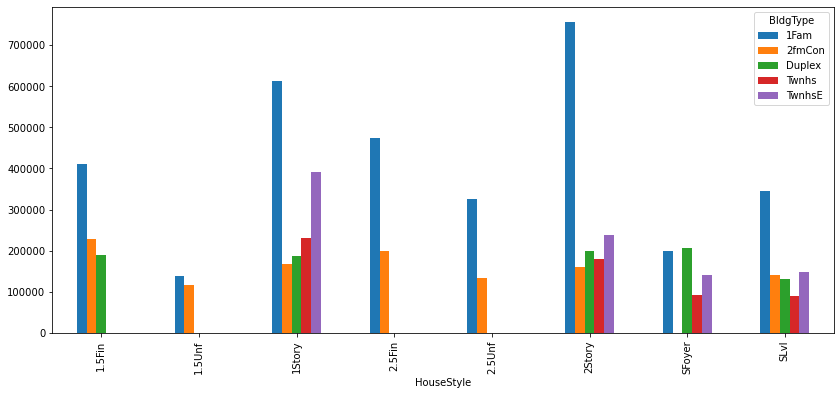

In [43]:
a.plot(kind='bar',figsize=(14,6))

In [44]:
b = house_df.pivot_table(index='HouseStyle',columns='BldgType',values='SalePrice',aggfunc=('mean'))
b

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
HouseStyle,,,,,
1.5Fin,143726.957746,132106.250000,143475.000000,NaN,NaN
1.5Unf,109546.153846,118000.000000,NaN,NaN,NaN
1Story,175413.097199,135500.000000,125669.896552,201400.000000,201151.025641
2.5Fin,222857.142857,200000.000000,NaN,NaN,NaN
2.5Unf,163888.888889,127950.000000,NaN,NaN,NaN
2Story,226940.185083,114740.909091,147083.666667,133415.151515,144402.833333
SFoyer,147810.000000,NaN,141061.777778,85875.000000,107125.000000
SLvl,169653.666667,140000.000000,132500.000000,91000.000000,146500.000000


<AxesSubplot:xlabel='HouseStyle'>

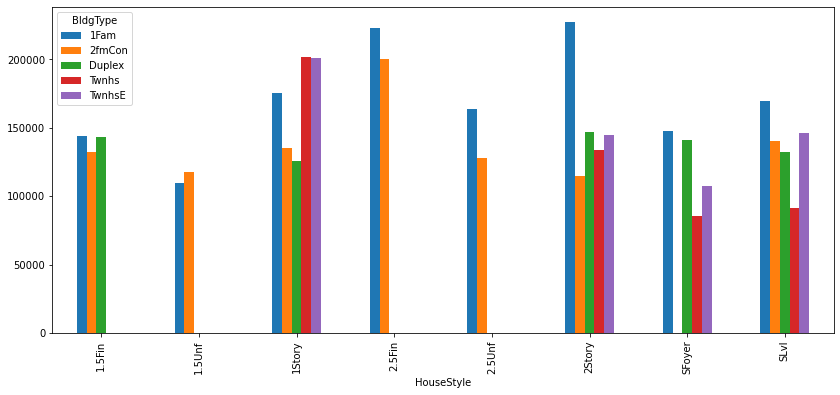

In [100]:
b.plot(kind='bar',figsize=(14,6))

## 2-Story (house style) and 1 Fam (building type) houses are costlier ...

# Ques 11 :
## Write a function that takes dataFrame and gives every variable name,Percent of missing Values and percent of zero's against those each and every variable.

In [46]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

#https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

In [86]:
missing_zero_values_table(house_df_X)

Your selected dataframe has 80 columns and 1460 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PoolQC,0,1453,99.5,1453,99.5,object
MiscFeature,0,1406,96.3,1406,96.3,object
Alley,0,1369,93.8,1369,93.8,object
Fence,0,1179,80.8,1179,80.8,object
FireplaceQu,0,690,47.3,690,47.3,object
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object


percent_missing = house_df_X.isnull().sum() * 100 / len(house_df_X)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)

missing_value_df

# Ques 12 :
## Write a function that prints box plots for every eligible variable in one PDF... Also,Genarate Another File That Prints Boxplots without outliers for those variables...

In [48]:
a = house_df.select_dtypes(include=['int64','float64'])
a.shape

(1460, 38)

In [79]:
from matplotlib.backends.backend_pdf import PdfPages

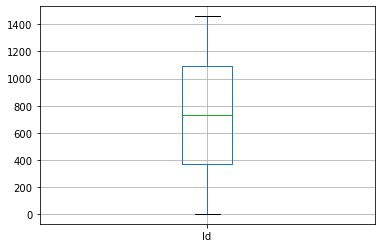

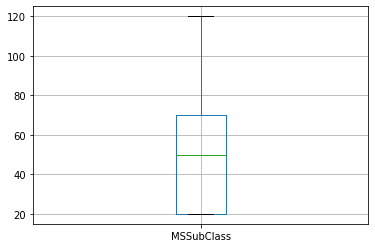

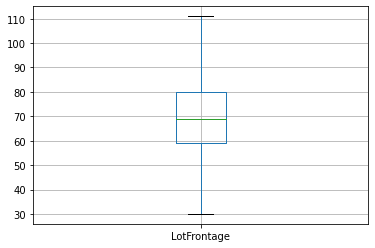

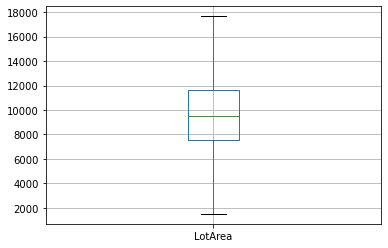

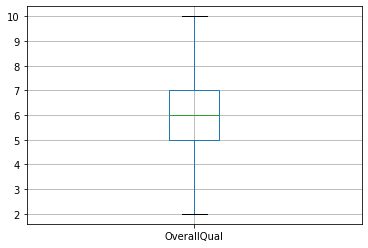

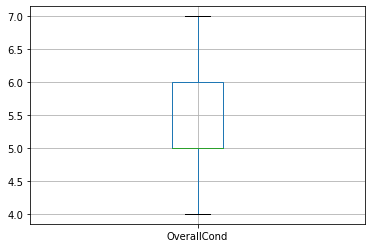

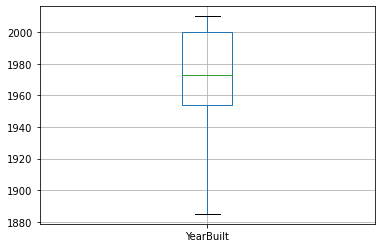

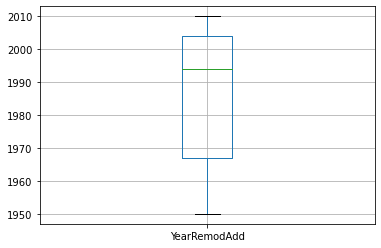

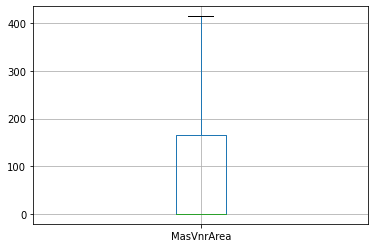

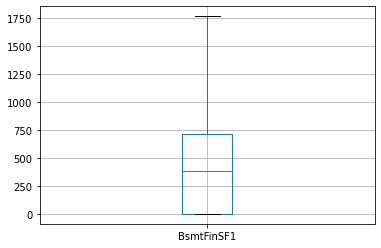

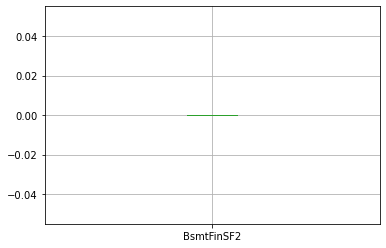

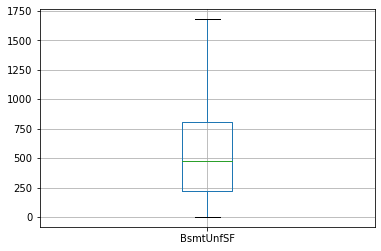

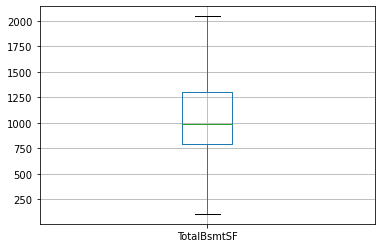

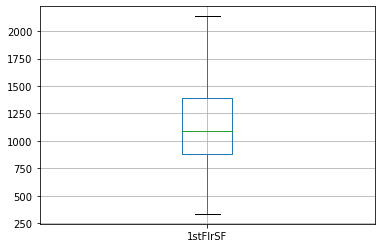

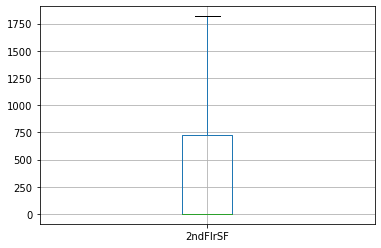

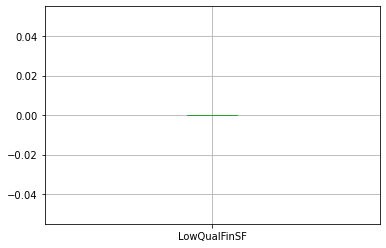

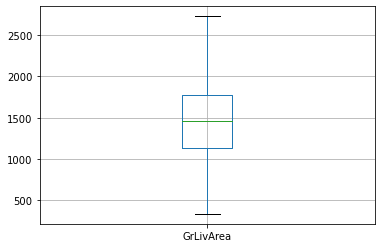

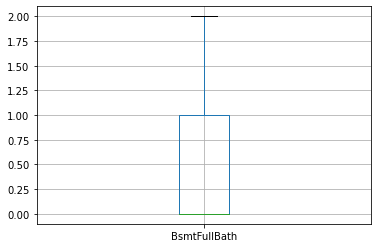

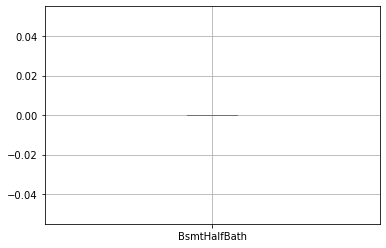

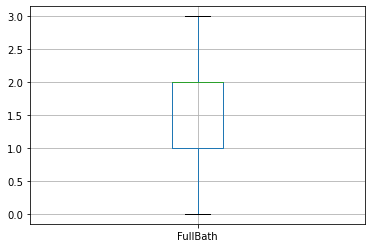

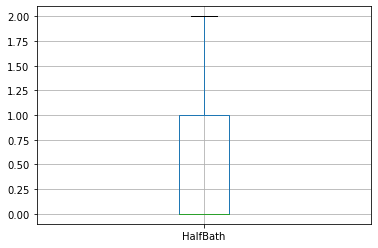

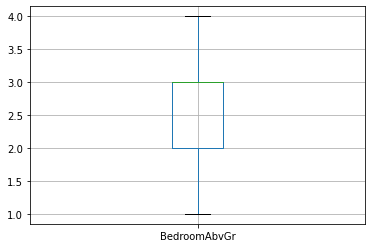

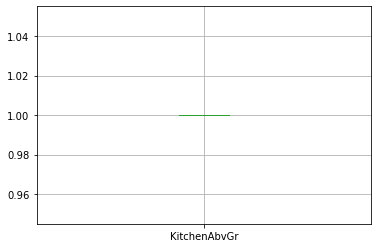

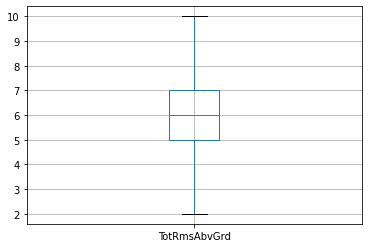

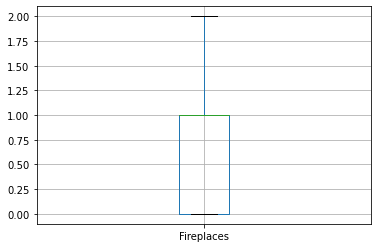

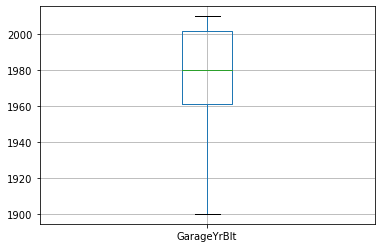

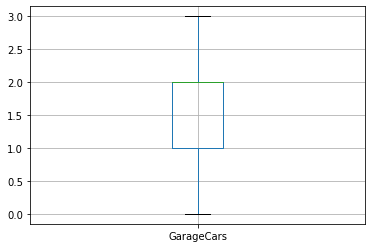

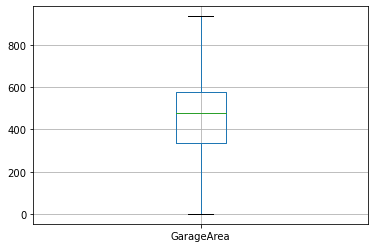

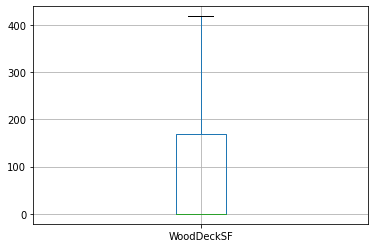

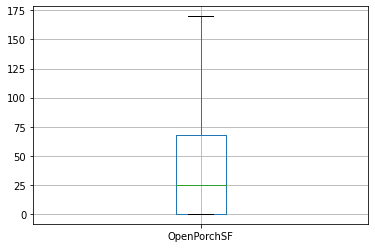

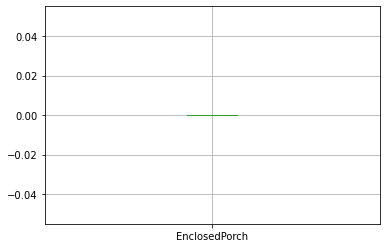

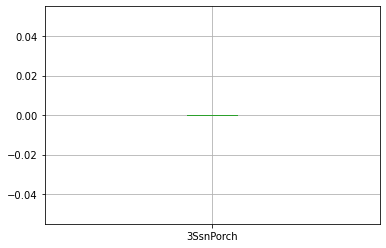

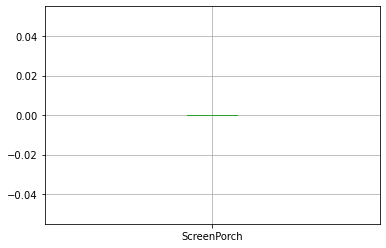

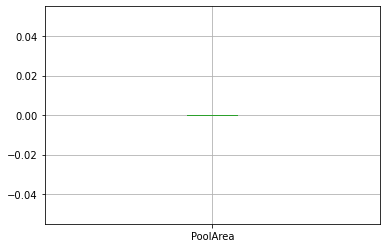

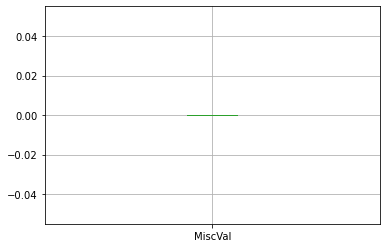

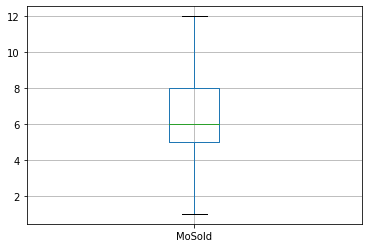

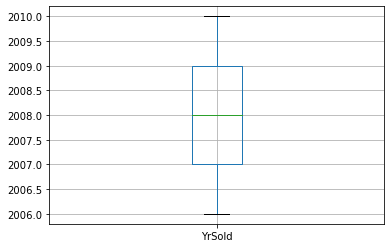

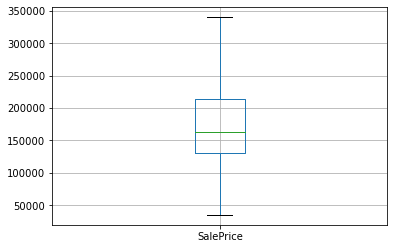

In [87]:
for column in a:
    plt.figure()
    a.boxplot([column],showfliers=False)
    #plt.savefig("without outliers box for all variables1.pdf")
    #pp = PdfPages('multipage.pdf')
    #plt.savefig(pp, format='pdf')
    #pp.savefig()
    #pp.close()

In [ ]:
#a = house_df.select_dtypes(include=['int64','float64'])
#a.shape

In [ ]:
house_df.shape

In [ ]:
81-43

July06

 printing  Id ...

 printing  MSSubClass ...

 printing  LotFrontage ...

 printing  LotArea ...

 printing  OverallQual ...

 printing  OverallCond ...

 printing  YearBuilt ...

 printing  YearRemodAdd ...

 printing  MasVnrArea ...

 printing  BsmtFinSF1 ...

 printing  BsmtFinSF2 ...

 printing  BsmtUnfSF ...

 printing  TotalBsmtSF ...

 printing  1stFlrSF ...

 printing  2ndFlrSF ...

 printing  LowQualFinSF ...

 printing  GrLivArea ...

 printing  BsmtFullBath ...

 printing  BsmtHalfBath ...

 printing  FullBath ...

 printing  HalfBath ...

 printing  BedroomAbvGr ...

 printing  KitchenAbvGr ...

 printing  TotRmsAbvGrd ...

 printing  Fireplaces ...

 printing  GarageYrBlt ...

 printing  GarageCars ...

 printing  GarageArea ...

 printing  WoodDeckSF ...

 printing  OpenPorchSF ...

 printing  EnclosedPorch ...

 printing  3SsnPorch ...

 printing  ScreenPorch ...

 printing  PoolArea ...

 printing  MiscVal ...

 printing  MoSold ...

 printing  YrSold ...

 prin

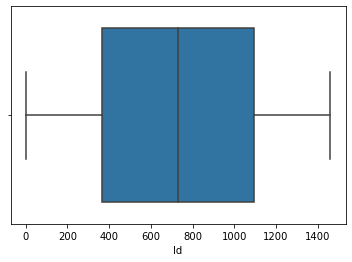

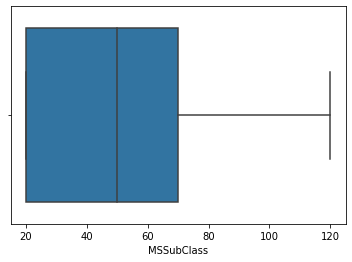

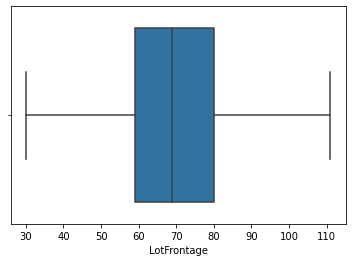

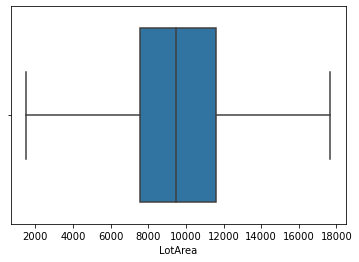

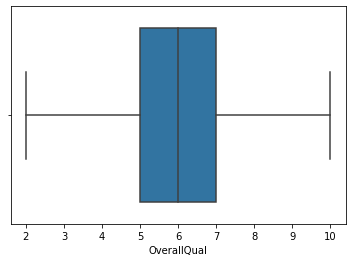

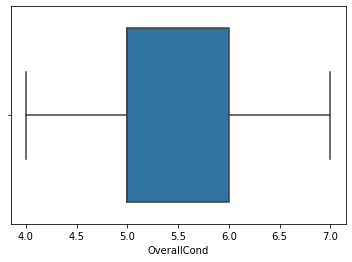

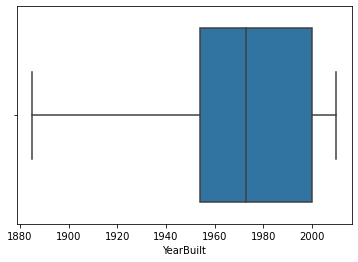

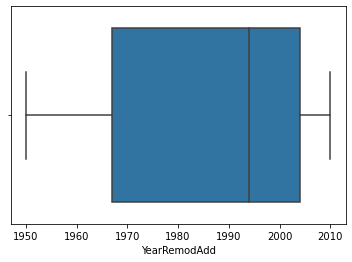

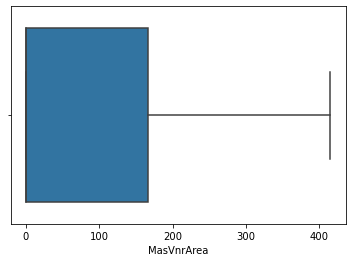

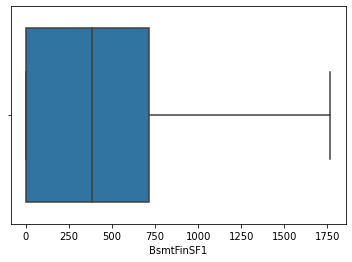

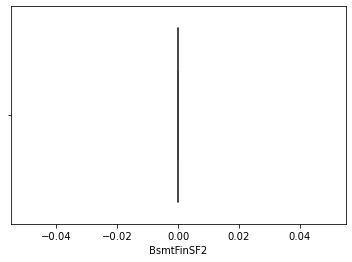

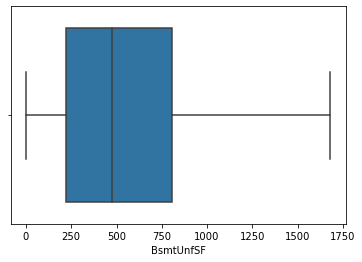

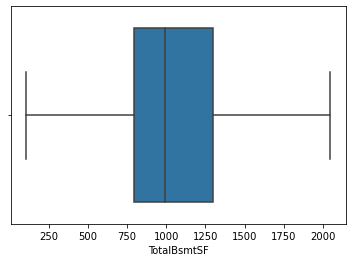

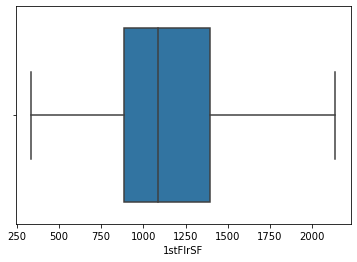

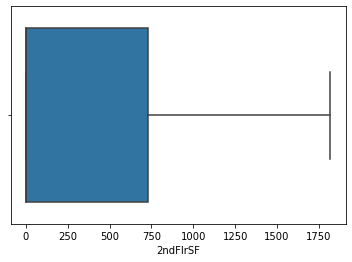

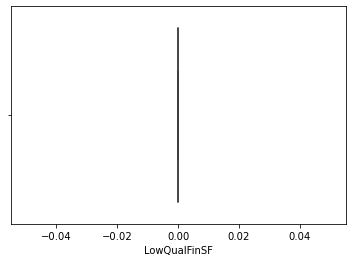

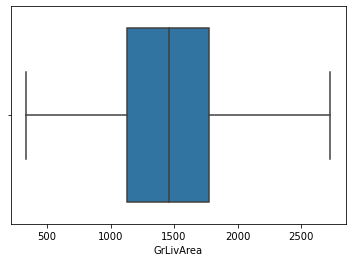

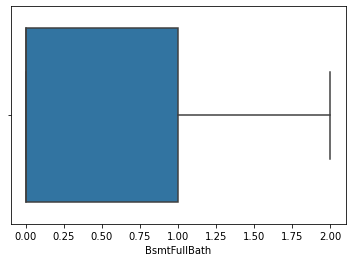

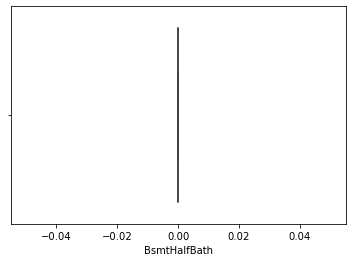

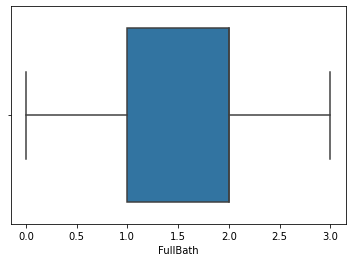

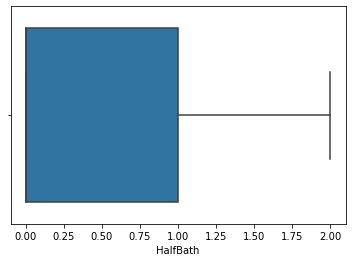

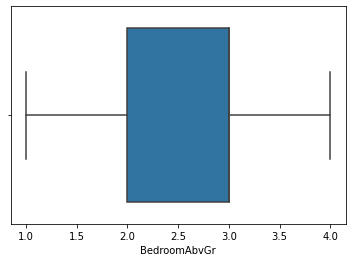

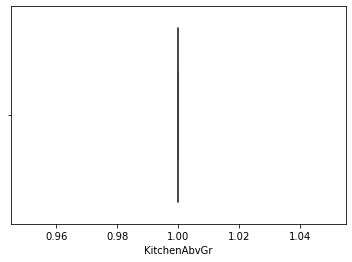

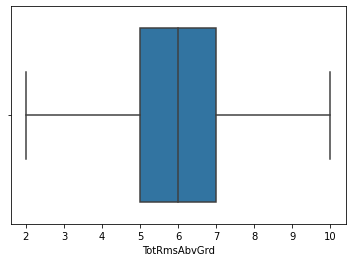

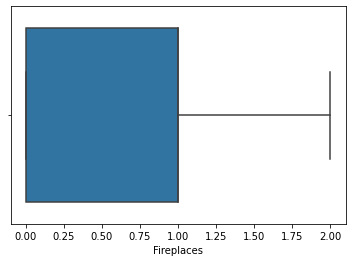

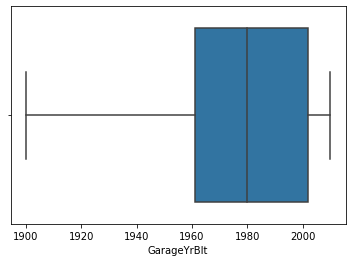

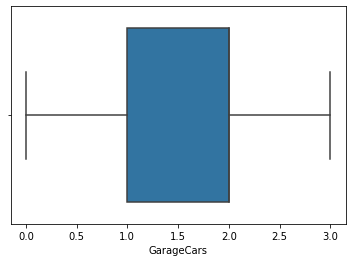

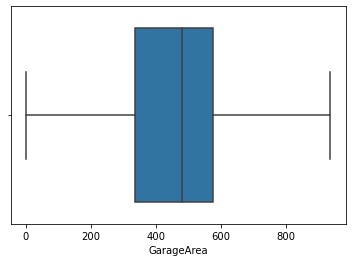

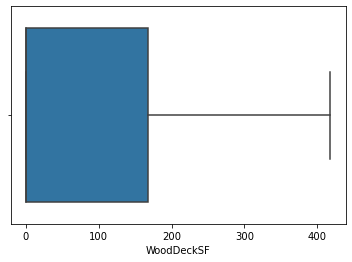

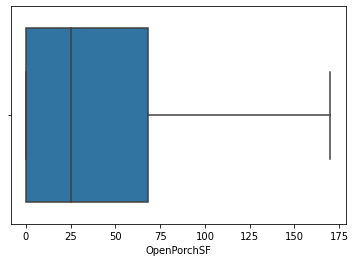

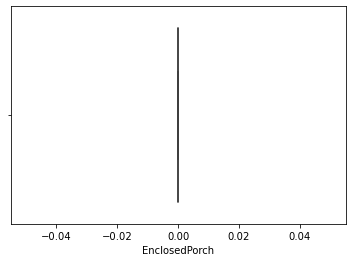

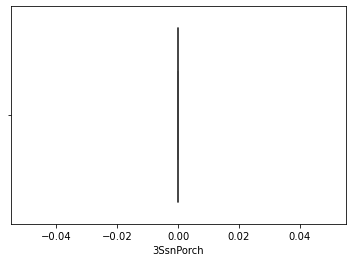

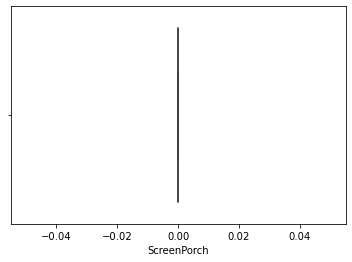

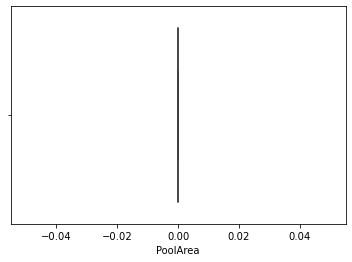

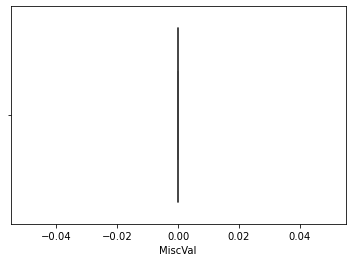

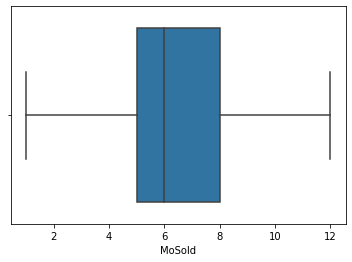

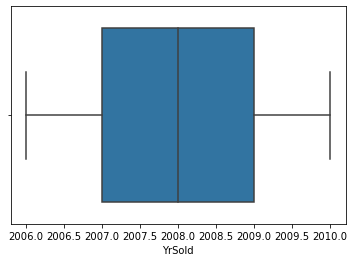

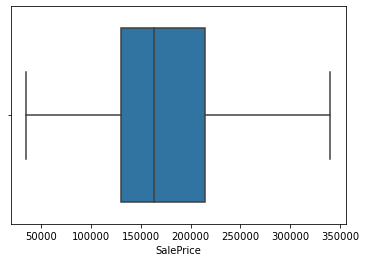

In [103]:
import datetime
today_date = datetime.datetime.now().strftime("%B")+datetime.datetime.now().strftime("%d")
print (today_date)

from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

pp = PdfPages('{}_{}.pdf'.format("my_file_sns",today_date))
for ind_var in a.select_dtypes(exclude="object"):
    print("\n printing ",ind_var, "...")
    
    fig, ax = plt.subplots(1, 1)
    sns.boxplot(a[ind_var],showfliers=False)
    #boxplot = pd.DataFrame(coat_agg_sel_df[ind_var]).boxplot()
    pp.savefig(fig)
pp.close()